Files already downloaded and verified


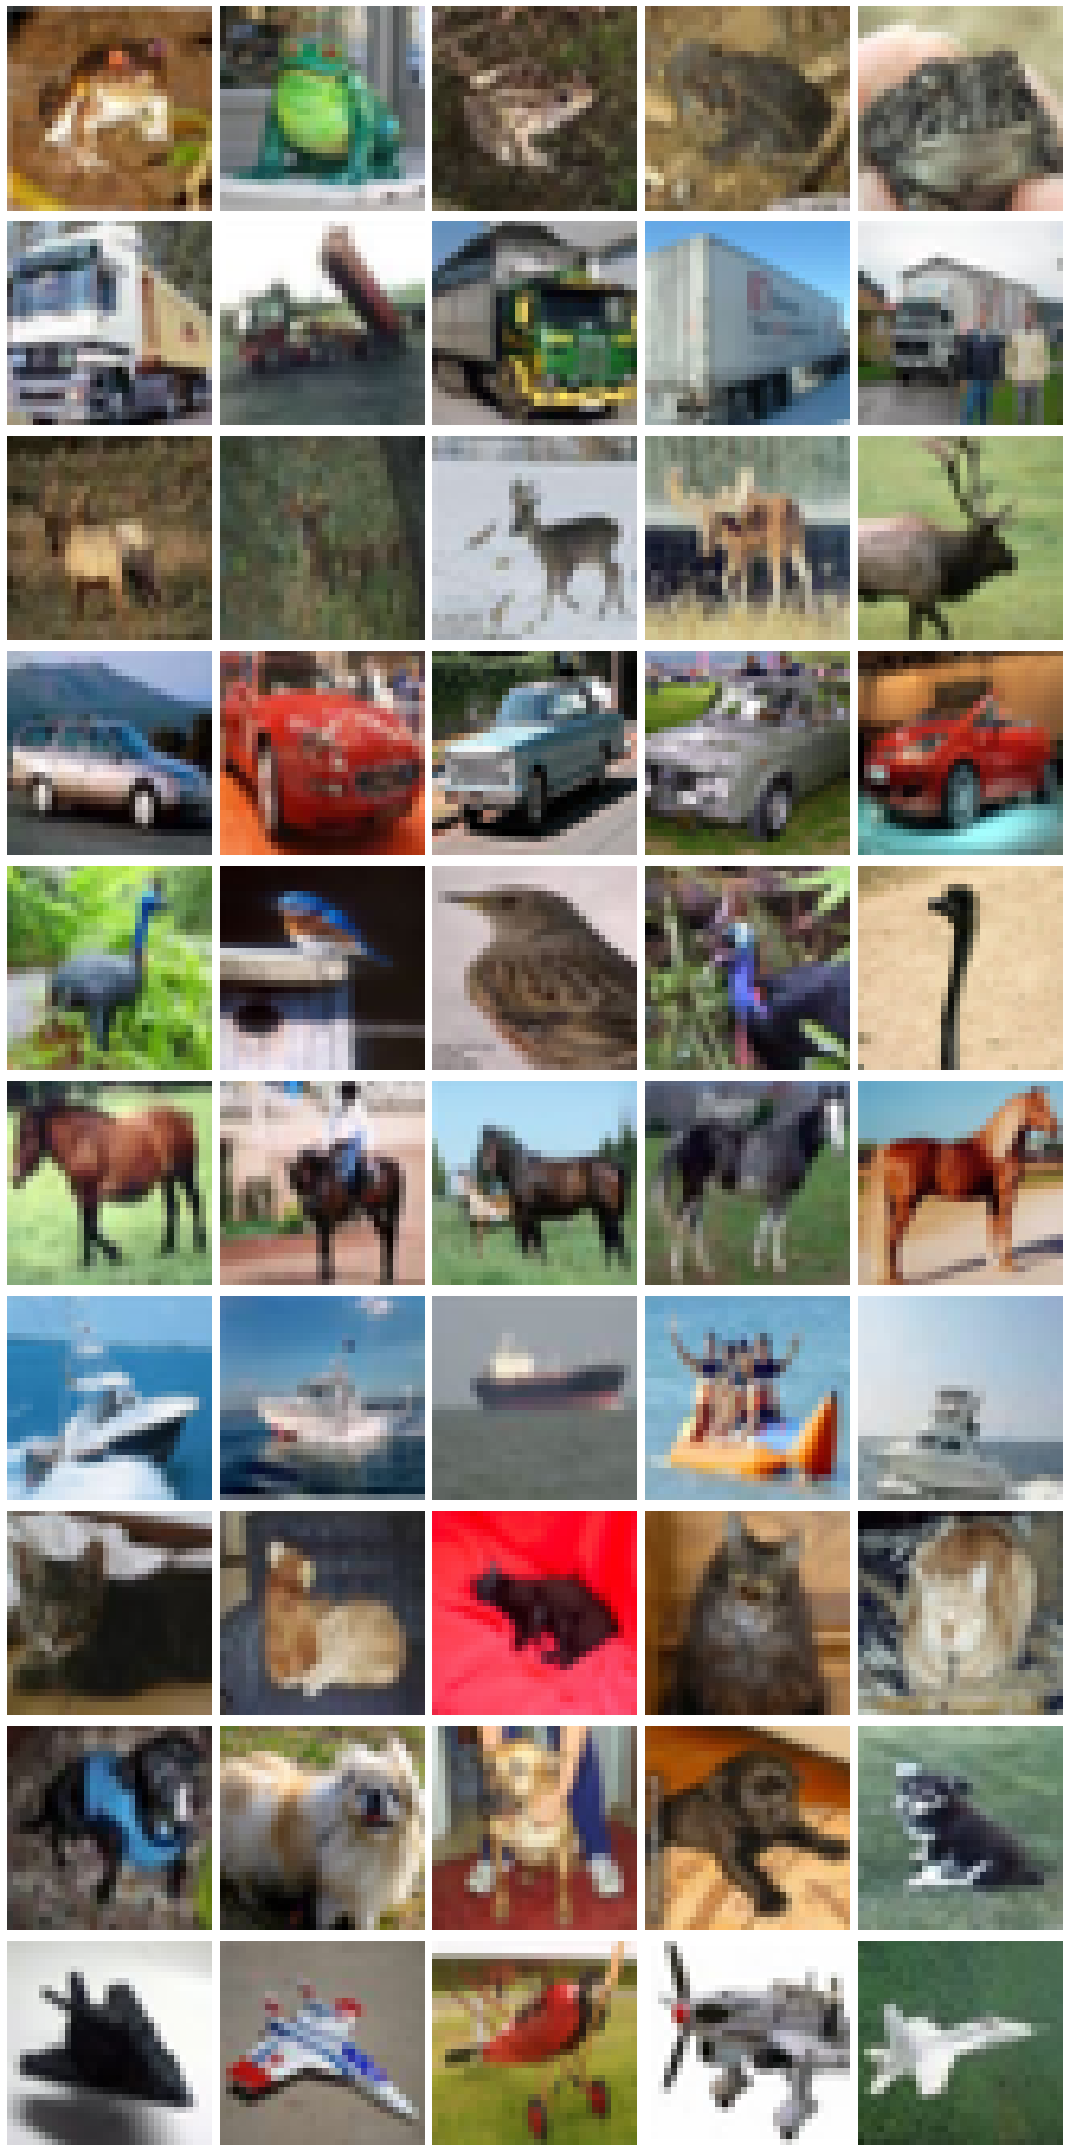

In [2]:
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

class_images = {}

for i in range(len(train_dataset)):
    image, label = train_dataset[i]
    class_name = train_dataset.classes[label]
    if class_name not in class_images:
        class_images[class_name] = []
    if len(class_images[class_name]) < 5:
        class_images[class_name].append(image)
        
num_classes = len(class_images)
fig, axes = plt.subplots(num_classes, 5, figsize=(15, 3*num_classes))
for i, (class_name, images) in enumerate(class_images.items()):
    for j, image in enumerate(images):
        axes[i, j].imshow(image.permute(1, 2, 0))  # Convert tensor to numpy array
        axes[i, j].axis('off')
        # axes[i, j].set_title(f'Class: {class_name}')
        if j == 0: axes[i, j].set_ylabel(f'Class: {class_name}', fontsize=12)
        
# plt.title("Sample Dataset (CIFAR-10)", fontsize=16)
plt.tight_layout()
plt.savefig("./dataset_samples.png", dpi=500)
plt.show()

In [3]:
import numpy as np

with open("./results.txt", "r") as file:
    lines = file.readlines()
    file.close()
    
data = {}
experiment = 0
experiments_names = ["adam_relu", "sgd_relu", "agd_relu", "pgd_relu", "sgdr_relu", "adam_lrelu", "sgd_lrelu", "agd_lrelu", "pgd_lrelu", "sgdr_lrelu", "adam_tanh", "sgd_tanh", "agd_tanh", "pgd_tanh", "sgdr_tanh"]

# print(lines)

for i in range(0, len(lines), 21):
    temp = {}
    temp["activation"] = lines[i].split(":")[1].strip(" ").strip("\n")
    temp["optimizer"] = lines[i + 1].split(":")[1].strip(" ").strip("\n")
    temp["value"] = lines[i + 2].split(":")[1].strip(" ").strip("\n")
    temp["criterion"] = lines[i + 3].split(":")[1].strip(" ").strip("\n")
    
    temp["training_loss"] = lines[i + 4].split(":")[1].strip(" ").strip("\n").split(" ")
    temp["training_loss"] = [float(num_str) for num_str in temp["training_loss"]]
    
    temp["training_accuracy"] = lines[i + 5].split(":")[1].strip(" ").strip("\n").split(" ")
    temp["training_accuracy"] = [float(num_str) for num_str in temp["training_accuracy"]]
    
    temp["validation_loss"] = lines[i + 6].split(":")[1].strip(" ").strip("\n").split(" ")
    temp["validation_loss"] = [float(num_str) for num_str in temp["validation_loss"]]
    
    temp["validation_accuracy"] = lines[i + 7].split(":")[1].strip(" ").strip("\n").split(" ")
    temp["validation_accuracy"] = [float(num_str) for num_str in temp["validation_accuracy"]]
    
    temp["epoch_times"] = lines[i + 8].split(":")[1].strip(" ").strip("\n").split(" ")
    temp["epoch_times"] = [float(num_str) for num_str in temp["epoch_times"]]
    
    temp["weights"] = np.array([[float(num) for num in l.strip("\n").split(" ")] for l in [lines[10], lines[11], lines[12], lines[13], lines[14], lines[15], lines[16], lines[17], lines[18], lines[19]]])
    
    data[experiment] = temp
    
    experiment = experiment + 1
    
# print(data)

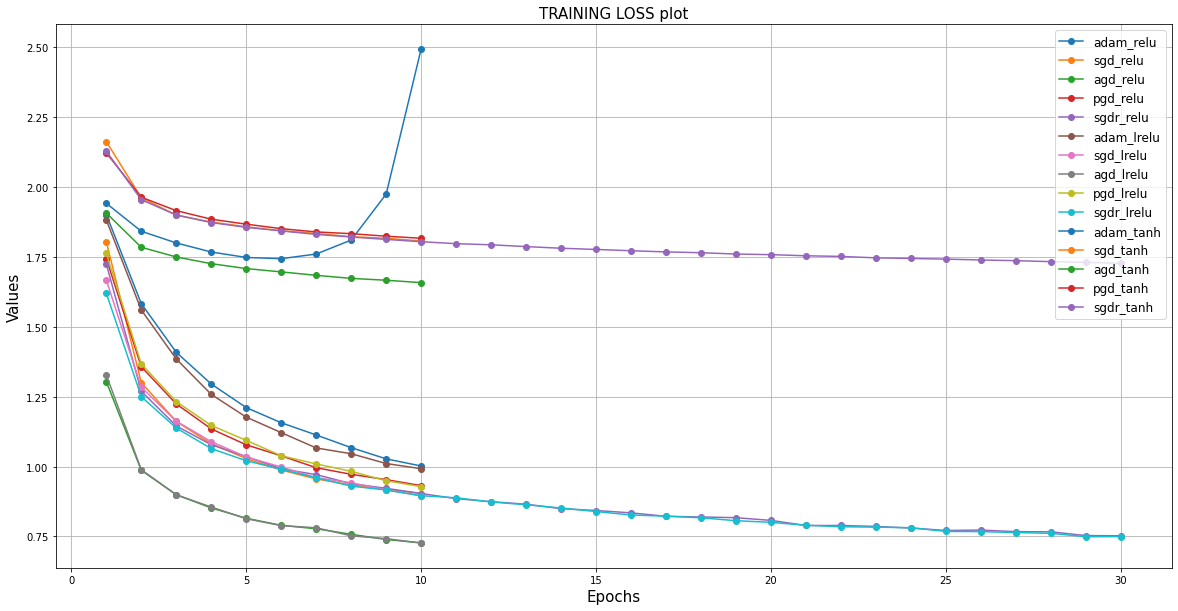

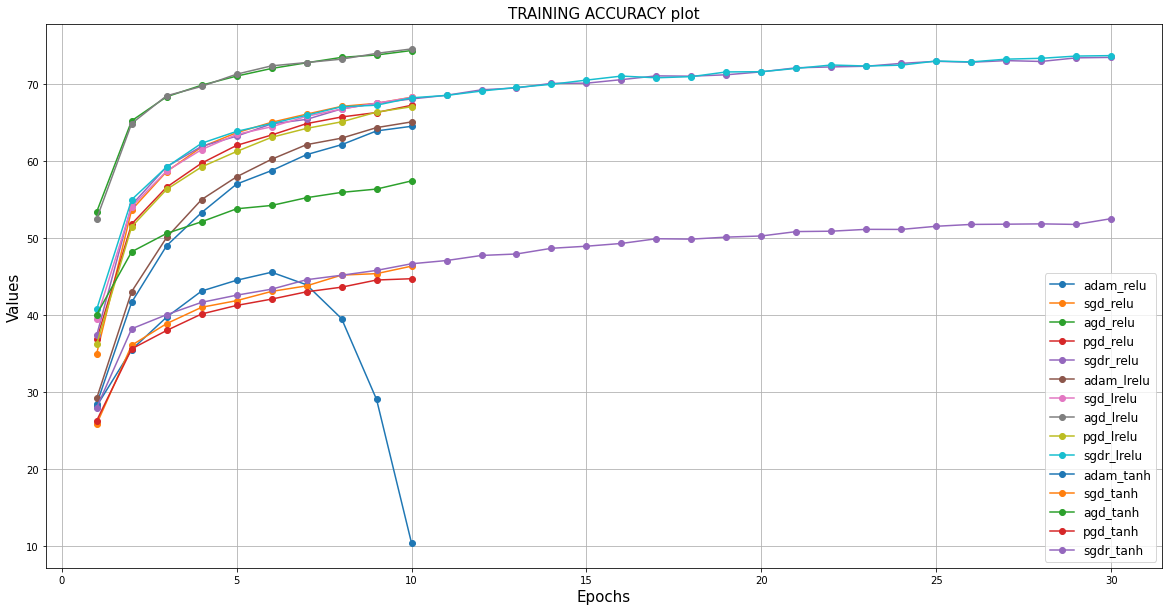

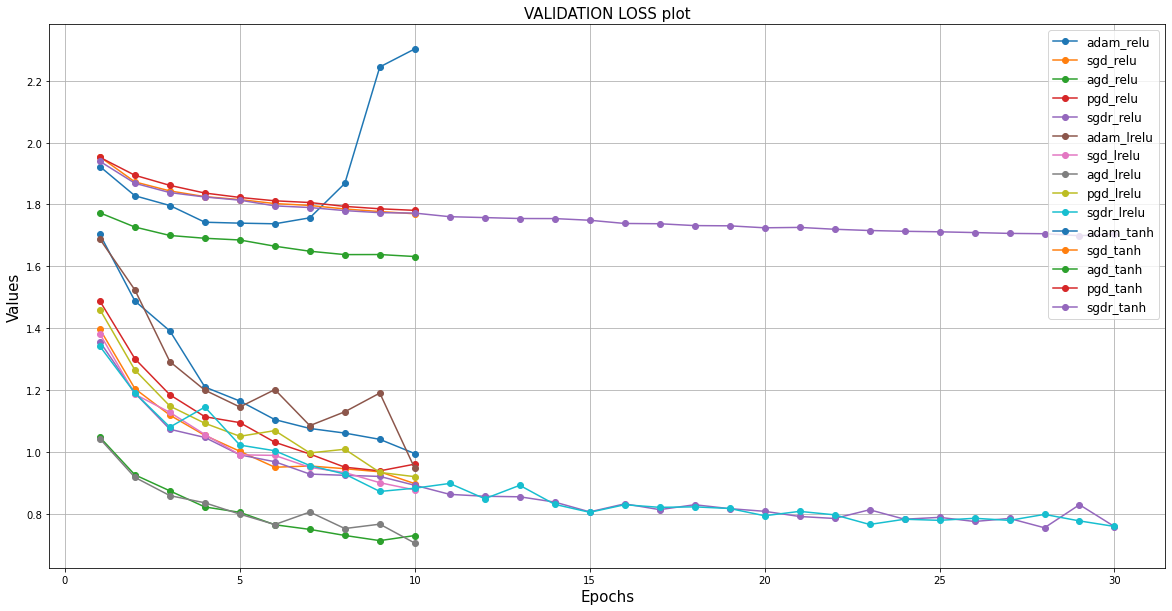

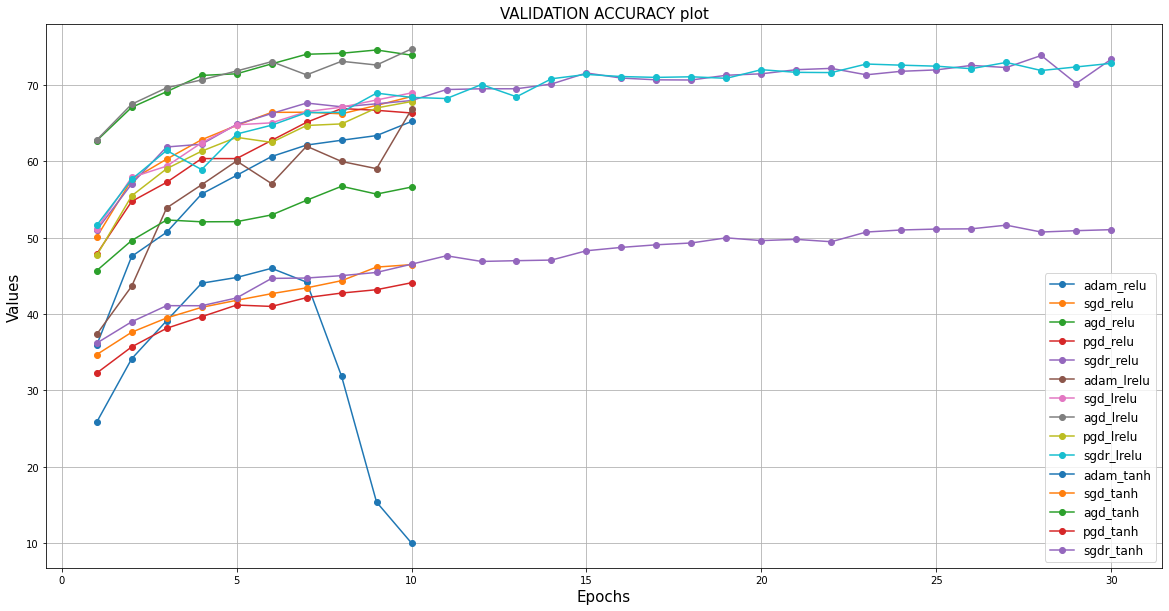

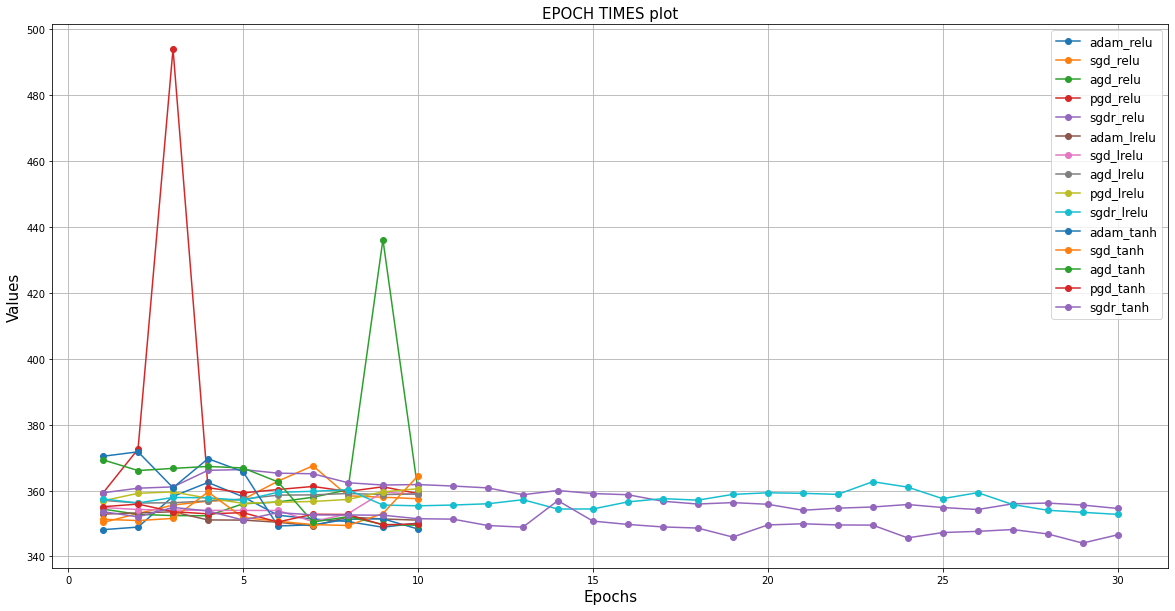

In [4]:

def plot(key):
    plt.figure(figsize=(20, 10))
    for exp in data.keys():
        x_axis = range(1, len(data[exp][key]) + 1)
        plt.plot(x_axis, data[exp][key], marker='o', label=experiments_names[exp])
    
    plt.title(f'{key.upper().replace("_", " ")} plot', fontsize=15)
    plt.legend(fontsize='large')
    plt.grid()
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Values', fontsize=15)
    plt.savefig(f"{key}.png")
    plt.show()
    
plot("training_loss")
plot("training_accuracy")
plot("validation_loss")
plot("validation_accuracy")
plot("epoch_times")

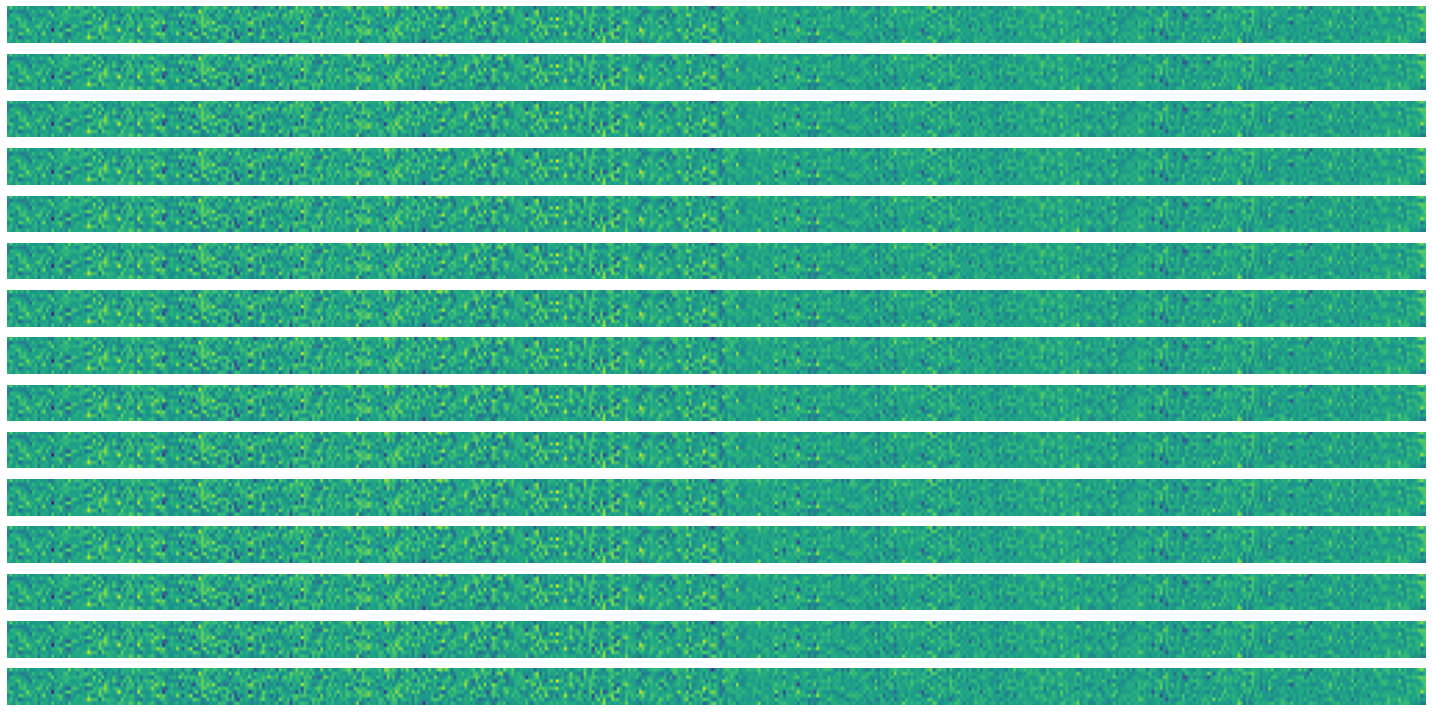

<Figure size 432x288 with 0 Axes>

In [5]:
# Plotting weights
fig, axs = plt.subplots(15, 1, figsize=(20, 10))
for exp in data.keys():
    matrix_data = data[exp]["weights"]
    axs[exp].imshow(matrix_data, cmap='viridis', aspect='auto')
    axs[exp].set_axis_off()

# plt.title("Classifier weights")
plt.tight_layout()
plt.show()
plt.savefig("classifier_weights.png", dpi=500)

In [6]:
# print model size and weights
import os
import torch
from utils import models

weights_path = os.path.join(os.getcwd(), "weights", "squeezenet1_0-b66bff10.pth")

model = models.build_model(10, weights_path, "relu")
num_params = sum(p.numel() for p in model.parameters())
model_size = sum(p.element_size() * p.numel() for p in model.parameters()) * 4 / (1024 ** 2)
print(num_params, model_size)

print(model)

740554 11.299957275390625
SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): FireModule(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_act): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_act): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_act): ReLU(inplace=True)
    )
    (4): FireModule(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_act): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_act): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_act): ReLU(inplace=True)
    )
    (5): FireModule(
 